In [ ]:
#Laboratorio 5
#Constanza Soto Suárez

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
#Definimos los paramentros correspondientes a la cantidad de estrellas a simular y la edad máxima de estas, en este caso la edad de la Vía Lactea.

n_stars = 100000
max_t_star = 10 

In [96]:
#Acorde a Kroupa IMF, para rangos de masa ente 0.01 y 0.08 masas solares, el indice de ley de potencia (alpha) es 0.3, entre 0.08 y 0.5 es de 1.3, y entre 0.5 y 100 es de 2.3

alpha_low = 0.3
alpha_middle = 1.3
alpha_high = 2.3

#Antes de determinar las masas, debemos definir la probabilidad de ocurrencia para cada rango.
#Primero calculamos el "weight" normalizado para cada rango, esto ya que estamos hablado de rangos y no valores específicos

w1 = ((0.08**(1.0 - alpha_low) - 0.01**(1.0 - alpha_low)) / (1.0 - alpha_low))
w2 = ((0.5**(1.0 - alpha_middle) - 0.08**(1.0 - alpha_middle)) / (1.0 - alpha_middle))
w3 = ((100**(1.0 - alpha_high) - 0.5**(1.0 - alpha_high)) / (1.0 - alpha_high))
total_w = w1 + w2 + w3


#Ahora, daremos el número de estrellas a cada rango según su probabilidad de ocurrencia, esta correspondería al "weight" del intervalo partido en el total.
#Para asignar una distribución radom de datos, utilizamos la distribución binomial.

n_low = np.random.binomial(n_stars, w1/total_w)
n_middle = np.random.binomial((n_stars - n_low), (w2/total_w)/((w2/total_w) + (w3/total_w))) 
n_high = n_stars - (n_middle + n_low)

#Habiendo realizado todo esto, procedemos a asignarle un valor para la masa a cada estrella segun la distribución dada por el power law.

m_low = ((0.08**(1.0 - alpha_low) - 0.01**(1.0 - alpha_low)) * np.random.random(n_low) + 0.01**(1.0 - alpha_low))**(1.0 / (1.0 - alpha_low))
m_middle = ((0.5**(1.0 - alpha_middle) - 0.08**(1.0 - alpha_middle)) * np.random.random(n_middle) + 0.08**(1.0 - alpha_middle))**(1.0 / (1.0 - alpha_middle))
m_high = ((100**(1.0 - alpha_high) - 0.5**(1.0 - alpha_high)) * np.random.random(n_high) + 0.5**(1.0 - alpha_high))**(1.0 / (1.0 - alpha_high))

#print(m_low)
#print(m_middle)
#print(m_high)

In [97]:
#Para asignar el tiempo en el que nació la estralla, vamos a considear una taza de formación estelar (SFR) constante, de esta forma, ocupamos la función de numpy para crear una distribución uniforme de los datos random.
#El tiempo de nacimiento de la estrella es entre 0 y la edad de la galaxia

t_birth = np.random.uniform(0, max_t_star, n_stars)


In [98]:
total_mass = m_low
total_mass = np.append(total_mass, m_middle)
total_mass = np.append(total_mass, m_high)

#"Desordenamos" los datos de las masas para poder asignales valores del tiempo de nacimiento aleatoriamente.
np.random.shuffle(total_mass)

#Ahora calculamos el tiempo de vida de las estrellas en la secuecia principal utilizando la fórmula que relaciona el tiempo del Sol en la secuencia principal y la masa de la estrella
t_ms = 10 / (total_mass**2.5)

star_age = 10 - t_birth
#Podemos idetificar si una estrella ha terminado su paso por la MS, si el tiempo de vida de la estrella es mayor al de la MS, quiere decir que ya es una "stellar remnant".

pos_sr = np.where(star_age > t_ms)[0] #En este array quedan guardadas las posiciones que corresponden a las que las stellar remnant
pos_ms = np.where(star_age < t_ms)[0]

In [99]:
ms_stars = total_mass[pos_ms]
ms_age = star_age[pos_ms]
wd_im = []
wd_fm = []
ns_im = []
ns_fm = []
bh_im = []
bh_fm = []

wd_age = []
ns_age = []
bh_age = []

for i in range(len(total_mass[pos_sr])):
    #es una enana blanca si la masa inicial cumple la siguiente condición:
    if total_mass[pos_sr][i] <= 8: 
        wd_im.append(total_mass[pos_sr][i])
        #su masa final se calcula:
        final_mass = 0.109 * total_mass[pos_sr][i] + 0.394
        wd_fm.append(final_mass)
        wd_age.append(star_age[pos_sr][i])

    #es una eestrella de neutrones si la masa inicial cumple la siguiente condición:
    elif 8 < total_mass[pos_sr][i] <= 20:
        ns_im.append(total_mass[pos_sr][i])
        #su masa final se calcula con las siguientes condiciones:
        if 9 <= total_mass[pos_sr][i] <= 13:
            ns_fm.append(2.24 + 0.508*(total_mass[pos_sr][i] - 14.75) + 0.125*(total_mass[pos_sr][i] - 14.75)**2 + 0.0110*(total_mass[pos_sr][i] - 14.75)**3)
            ns_age.append(star_age[pos_sr][i])
            
        elif 9 < total_mass[pos_sr][i] < 13:
            ns_fm.append(0.123 + 0.112 * total_mass[pos_sr][i])
            ns_age.append(star_age[pos_sr][i])
        
        elif 15 <= total_mass[pos_sr][i] <= 17.8:
            ns_fm.append(0.996 + 0.0384 * total_mass[pos_sr][i])
            ns_age.append(star_age[pos_sr][i])
        
        elif 17.8 < total_mass[pos_sr][i] < 18.5:
            ns_fm.append(-0.020 + 0.1 * total_mass[pos_sr][i])
            ns_age.append(star_age[pos_sr][i])
            
    elif total_mass[pos_sr][i] > 20:
        bh_im.append(total_mass[pos_sr][i])
        #su masa final se calcula con las siguientes condiciones:
        if 45 <= total_mass[pos_sr][i] <= 120:
            final_mass = 5.697 + 7.8598 * (10**8) * total_mass[pos_sr][i]**(-4.858)
            bh_fm.append(final_mass)
            bh_age.append(star_age[pos_sr][i])

        elif 15 <= total_mass[pos_sr][i] <= 40:
            bhm = -2.049 + 0.414 * total_mass[pos_sr][i]
            
            all = 15.52 - 0.3294 * (total_mass[pos_sr][i] - 25.97) - 0.02121 * (total_mass[pos_sr][i] - 25.97)**2 + 0.003120 * (total_mass[pos_sr][i] - 25.97)**3
            
            final_mass = 0.9 * bhm + (1 - 0.9) * all
            bh_fm.append(final_mass)
            bh_age.append(star_age[pos_sr][i])
        

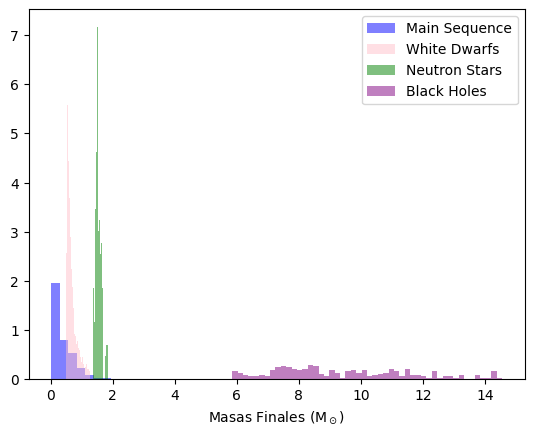

In [116]:
#realizamos el "normalised histogram" para las masas finales

plt.hist(ms_stars, bins=50, color='blue', alpha=0.5, density=True, label='Main Sequence')
plt.hist(wd_fm, bins=50, color='pink', alpha=0.5, density=True, label='White Dwarfs')
plt.hist(ns_fm, bins=50, color='green', alpha=0.5, density=True, label='Neutron Stars')
plt.hist(bh_fm, bins=50, color='purple', alpha=0.5, density=True, label='Black Holes')
plt.xlabel(r'Masas Finales (M$_\odot$)')
plt.legend()
plt.show()


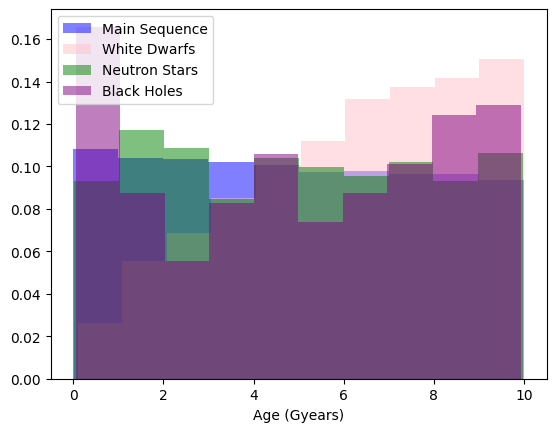

In [117]:
#y finalmente el histograma normalizado para las edades

plt.hist(ms_age, bins=10, color='blue', alpha=0.5, density=True, label='Main Sequence')
plt.hist(wd_age, bins=10, color='pink', alpha=0.5, density=True, label='White Dwarfs')
plt.hist(ns_age, bins=10, color='green', alpha=0.5, density=True, label='Neutron Stars')
plt.hist(bh_age, bins=10, color='purple', alpha=0.5, density=True, label='Black Holes')
plt.xlabel('Age (Gyears)')
plt.legend()
plt.show()